# Computing the elements of the local clifford group

In [2]:
from itertools import product
import sympy
i = sympy.I
exp = sympy.exp
M = sympy.Matrix
simplify = sympy.simplify
from sympy.physics.quantum.dagger import Dagger

sympy.init_printing()

In [3]:
I = M([[1, 0], [0, 1]])
X = M([[0, 1], [1, 0]])
Y = M([[0, -i], [i, 0]])
Z = M([[1, 0], [0, -1]])
O = M([[0, 0], [0, 0]])

In [4]:
H = M([[1, 1], [1, -1]]) / sympy.sqrt(2)
S = M([[1, 0], [0, i]])


In [5]:
C = [H, S]

In [6]:
def is_math_the_same(v):
    return simplify(v[0] - v[1]) == O


In [7]:
from multiprocessing import Pool, cpu_count

pool = Pool(cpu_count())

In [8]:

#def list_contains_matrix(l, m):
#    for elem in l:
#        test = simplify(elem - m)
#        if(test == 0):
#            return True
#    return False

def list_contains_matrix(l, m):
    #print(l, m)
    for test in pool.map(is_math_the_same, [(e,m) for e in l]):
        if(test):
            return True


#for i in range(10):
while(len(C) < 24):
    new_ops = ([c * H for c in C]
                + [c * S for c in C])
    for new_op in new_ops:
        new_op.simplify()
        #if(new_op not in C): # and Dagger(new_op) not in C):
        if(not list_contains_matrix(C, new_op)):
            print("found", new_op)
            C.append(new_op)
        #else:
            #print(new_op, "is already known")
            

found Matrix([[1, 0], [0, 1]])
found Matrix([[sqrt(2)/2, sqrt(2)/2], [sqrt(2)*I/2, -sqrt(2)*I/2]])
found Matrix([[sqrt(2)/2, sqrt(2)*I/2], [sqrt(2)/2, -sqrt(2)*I/2]])
found Matrix([[1, 0], [0, -1]])
found Matrix([[1/2 + I/2, 1/2 - I/2], [1/2 - I/2, 1/2 + I/2]])
found Matrix([[sqrt(2)/2, sqrt(2)/2], [-sqrt(2)/2, sqrt(2)/2]])
found Matrix([[sqrt(2)/2, sqrt(2)*I/2], [sqrt(2)*I/2, sqrt(2)/2]])
found Matrix([[sqrt(2)/2, -sqrt(2)/2], [sqrt(2)/2, sqrt(2)/2]])
found Matrix([[1, 0], [0, -I]])
found Matrix([[1/2 + I/2, 1/2 - I/2], [1/2 + I/2, -1/2 + I/2]])
found Matrix([[0, 1], [1, 0]])
found Matrix([[sqrt(2)/2, sqrt(2)/2], [-sqrt(2)*I/2, sqrt(2)*I/2]])
found Matrix([[1/2 + I/2, 1/2 + I/2], [1/2 - I/2, -1/2 + I/2]])
found Matrix([[sqrt(2)/2, sqrt(2)*I/2], [-sqrt(2)/2, sqrt(2)*I/2]])
found Matrix([[sqrt(2)/2, -sqrt(2)/2], [sqrt(2)*I/2, sqrt(2)*I/2]])
found Matrix([[sqrt(2)/2, -sqrt(2)*I/2], [sqrt(2)/2, sqrt(2)*I/2]])
found Matrix([[sqrt(2)*(1 + I)/2, 0], [0, sqrt(2)*(1 - I)/2]])
found Matrix([[1/

In [9]:
for c in C:
    c.simplify()
#C = [c for c in C if Dagger(c) not in C]

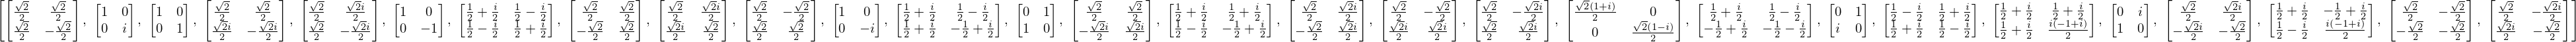

In [10]:

C

In [11]:
len(C)

This is bad. Does one have to ignore global phases? Note that the matrices 10 and 18 are the same, disregarding a phase of $pi/4$:

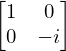

In [13]:
C[10]

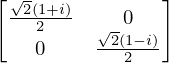

In [20]:
C[18]

XXX: continue here with computations

In [12]:
lookup_table = [ca * cb for ca, cb in product(C, C)]
for l in lookup_table:
    l.simplify()

In [13]:
len(lookup_table) == 24*24

False

In [14]:
ltb = []
row = []
for i, result in enumerate(lookup_table):
    if(i % 24):
        ltb.append(row)
        row = []
    row.append(result)


In [15]:
#lookup_table = [[C.index(i) for i in row] for row in ltb]
